In [1]:
import pandas as pd
df = pd.read_csv('data.csv', 
                 names=['time', 'low', 'high', 'open', 'close', 'volume', 'tw_sentiment', 'tw_followers', 'reddit_sentiment']
                )
df.head()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
0,1519997640,10969.0,10969.01,10969.01,10969.00,0.111542,0.195409,607130.0,0.113258
1,1519997700,10969.0,10969.00,10969.00,10969.00,0.504804,0.195409,607131.0,0.113258
2,1519997760,10965.0,10965.01,10965.00,10965.01,0.622844,0.195409,607135.0,0.113258
3,1519997820,10965.0,10965.00,10965.00,10965.00,0.036500,0.195408,607140.0,0.113258
4,1519997880,10964.8,10964.81,10964.81,10964.80,0.762078,0.195451,607349.0,0.113258


In [2]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
count,2.916000e+03,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2.916000e+03,2916.000000
mean,1.520085e+09,11208.211187,11210.622082,11209.395103,11209.469516,1.465436,0.054805,1.029932e+06,0.138590
std,5.051409e+04,184.535842,184.280898,184.414286,184.417351,1.933775,0.040701,2.495668e+05,0.022375
min,1.519998e+09,10765.000000,10786.810000,10785.010000,10782.000000,0.000111,-0.004737,4.487650e+05,0.059554
25%,1.520041e+09,11102.110000,11108.187500,11102.120000,11102.120000,0.301699,0.024063,8.856165e+05,0.123677
50%,1.520085e+09,11247.995000,11250.000000,11249.990000,11249.895000,0.871491,0.051242,1.025358e+06,0.138813
75%,1.520129e+09,11343.022500,11345.000000,11343.870000,11343.862500,1.887434,0.082558,1.179284e+06,0.157332
max,1.520173e+09,11492.370000,11493.750000,11493.750000,11493.740000,23.988752,0.195451,1.707796e+06,0.176271


In [3]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
time,1.000000,0.499446,0.500118,0.499677,0.499724,-0.137953,-0.561647,-0.072501,0.077858
low,0.499446,1.000000,0.999496,0.999698,0.999786,-0.023734,0.124308,-0.113395,0.407335
high,0.500118,0.999496,1.000000,0.999763,0.999745,-0.011507,0.124091,-0.113692,0.407504
open,0.499677,0.999698,0.999763,1.000000,0.999539,-0.017966,0.124464,-0.114060,0.407544
close,0.499724,0.999786,0.999745,0.999539,1.000000,-0.016847,0.124246,-0.113091,0.407347
volume,-0.137953,-0.023734,-0.011507,-0.017966,-0.016847,1.000000,0.075835,0.092125,-0.055702
tw_sentiment,-0.561647,0.124308,0.124091,0.124464,0.124246,0.075835,1.000000,-0.182525,0.295501
tw_followers,-0.072501,-0.113395,-0.113692,-0.114060,-0.113091,0.092125,-0.182525,1.000000,-0.045426
reddit_sentiment,0.077858,0.407335,0.407504,0.407544,0.407347,-0.055702,0.295501,-0.045426,1.000000


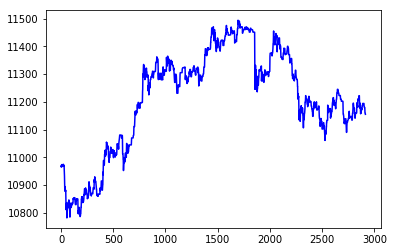

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df['close'], 'b')

### OPEN / Polynomial

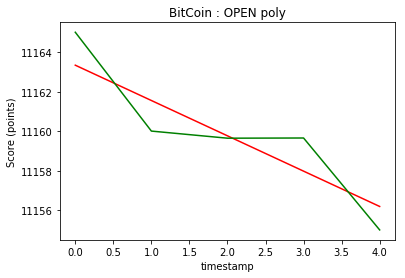

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

## 20 min
data_poly = df[-5:].reset_index()
X_poly = np.arange(len(data_poly)).reshape(-1, 1)
y_poly = data_poly['open'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_poly, test_size=0.3, shuffle=False)

model_poly_open = make_pipeline(PolynomialFeatures(1), Ridge())
model_poly_open.fit(X_train, y_train)

y_poly_predict = model_poly_open.predict(X_poly)

plt.title("BitCoin : OPEN poly")
plt.xlabel("timestamp")
plt.ylabel("Score (points)")
plt.plot(y_poly_predict, 'r')
plt.plot(data_poly["open"], 'g')
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
X = df[['open', 'reddit_sentiment', 'tw_sentiment', 'tw_followers']]
y = df['close'].values.reshape(-1, 1)

In [8]:
scalerX = MinMaxScaler(feature_range=(0, 1))
scalerY = MinMaxScaler(feature_range=(0, 1))
X_scale = scalerX.fit_transform(X)
y_scale = scalerY.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size=0.1, shuffle=False)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_train.shape

(2624, 1, 4)

In [11]:
np.random.seed(42)

model = Sequential()

model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('linear'))
model.summary()

model.compile(loss='mae', optimizer='adam')
model.fit(X_train, y_train, batch_size=X_train.shape[0], 
          epochs=300, validation_data=(X_test, y_test), shuffle=False, verbose=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 100)            42000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 122,501
Trainable params: 122,501
Non-trainable params: 0
_________________________________________________________________


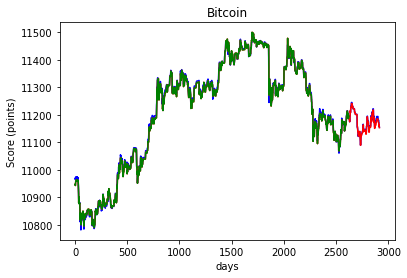

In [12]:
y_predict_train = model.predict(X_train)
y_predict_train = scalerY.inverse_transform(y_predict_train)

y_predict_test = model.predict(X_test)
y_predict_test = scalerY.inverse_transform(y_predict_test)

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_predict_train, y_predict_test), axis=0)

plt.title("Bitcoin")
plt.xlabel("days")
plt.ylabel("Score (points)")
plt.plot(df['close'], 'b')
plt.plot(y, 'r')
plt.plot(y_predict_train, 'g')
plt.show()

In [13]:
import time
from enum import Enum

class Order(Enum):
    STAY = 1
    DOWN = 2
    UP = 3

n_error = 0
y_predict_last = y_last = None
for index, row in df.iterrows():
    if y_predict_last is None:
        y_predict_last = y_last = row['open']
        
    x_predict = np.array([row['open'], row['reddit_sentiment'], row['tw_sentiment'], row['tw_followers']]).reshape(1, -1)
    x_predict = scalerX.transform(x_predict)
    x_predict_reshaped = np.reshape(x_predict, (1, 1, 4))
    y_predict_r = model.predict(x_predict_reshaped)
    y_predict_r_rescaled = scalerY.inverse_transform(y_predict_r)

    predict_order = real_order = Order.DOWN
    if y_predict_last < y_predict_r_rescaled:
        predict_order = Order.UP
    elif y_predict_last == y_predict_r_rescaled:
        predict_order = Order.STAY

    if y_last < row['open']:
        real_order = Order.UP
    elif y_last == row['open']:
        real_order = Order.STAY
    
    y_predict_last = y_predict_r_rescaled
    y_last = row['open']
    
    if real_order != predict_order:
        #print('predicted %s, real %s'% (predict_order, real_order))
        n_error = n_error + 1
        
count = df['open'].count()
percent = (n_error / count) * 100
print("Error Order percentage: %0.2f%%" % percent)

Error percentage: 9.40%
